In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

pd.set_option('float_format', '{:2f}'.format)
%matplotlib inline

In [2]:
data_clientes_estructura = pd.read_csv('data/Input1_clientes_estructura.csv', sep = ';')
data_clientes_venta = pd.read_csv('data/Input2_clientes_venta.csv', sep = ';')
data_clientes_test = pd.read_csv('data/Input3_clientes_test.csv', sep = ';')

In [3]:
data_clientes_estructura.drop(['Regional2'], axis = 1, inplace = True)
data_clientes_estructura['Gerencia2'] = data_clientes_estructura['Gerencia2'].str.replace('Gerencia_', '').astype('int32')
data_clientes_estructura['SubCanal2'] = data_clientes_estructura['SubCanal2'].str.replace('Subcanal_', '').astype('int32')
data_clientes_estructura['Categoria'] = data_clientes_estructura['Categoria'].str.replace('Categoria_', '').astype('int32')

In [4]:
data_clientes_venta['SegmentoPrecio2'] = data_clientes_venta['SegmentoPrecio2'].str.replace('SegmentoPrecio_', '').astype('int32')
data_clientes_venta['Marca2'] = data_clientes_venta['Marca2'].str.replace('Marca_', '').astype('int32')
data_clientes_venta['Cupo2'] = data_clientes_venta['Cupo2'].str.replace('Cupo_', '').astype('int32')
data_clientes_venta['CapacidadEnvase2'] = data_clientes_venta['CapacidadEnvase2'].str.replace('CapacidadEnvase_', '').astype('int32')

In [5]:
clientes_test = data_clientes_test['Cliente'].unique()
clientes_venta = data_clientes_venta['Cliente'].unique()
for item in clientes_test:
    if item not in clientes_venta:
        print(item)

In [6]:
df = data_clientes_venta.join(data_clientes_estructura.set_index('Cliente'), on = 'Cliente')
df['Target'] = 'Other'

In [7]:
df.loc[(df['Marca2'] == 20)  & (df['Cupo2'] == 3) & (df['CapacidadEnvase2'] == 9), 'Target'] = 'Marca1'
df.loc[(df['Marca2'] == 16)  & (df['Cupo2'] == 2) & (df['CapacidadEnvase2'] == 10), 'Target'] = 'Marca2'
df.loc[(df['Marca2'] == 9)   & (df['Cupo2'] == 3) & (df['CapacidadEnvase2'] == 12), 'Target'] = 'Marca3'
df.loc[(df['Marca2'] == 38)  & (df['Cupo2'] == 2) & (df['CapacidadEnvase2'] == 10), 'Target'] = 'Marca_Inno1'
df.loc[(df['Marca2'] == 39)  & (df['Cupo2'] == 2) & (df['CapacidadEnvase2'] == 10), 'Target'] = 'Marca_Inno2'
df = df[~(df['Target'] == 'Other')]

In [8]:
m1 = df[df['Target'] == 'Marca1']
m2 = df[df['Target'] == 'Marca2']
m3 = df[df['Target'] == 'Marca3']
mi1 = df[df['Target'] == 'Marca_Inno1']
mi2 = df[df['Target'] == 'Marca_Inno2']

In [9]:
#sample = df[df['Target'] == 'Marca3'].sample(n = 45000)

In [10]:
#df.drop(sample.index.tolist(), inplace = True)

In [11]:
#df.drop(columns = ['SegmentoPrecio2', 'Marca2', 'Cupo2', 'CapacidadEnvase2', 'Volumen', 'disc', 'nr'], inplace = True)
df.drop(columns = ['Marca2'], inplace = True)
df

,Año,Mes,Cliente,SegmentoPrecio2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Gerencia2,SubCanal2,Categoria,Nevera,Target
41,2019,9,10,3,3,12,0.037410,-27.511153,595.371853,3,1,2,1,Marca3
50,2019,10,10,3,3,12,0.018705,0.000000,312.594302,3,1,2,1,Marca3
75,2020,1,10,3,3,12,0.018705,0.000000,312.594302,3,1,2,1,Marca3
78,2020,2,10,3,3,12,0.187048,-362.140404,2775.419943,3,1,2,1,Marca3
94,2019,12,10,3,3,12,0.018705,-41.058746,289.278489,3,1,2,1,Marca3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,3,2,10,0.039122,0.000000,544.150314,8,3,2,0,Marca_Inno2
1406112,2020,7,20580,1,2,10,0.000000,0.000000,0.000000,10,5,6,0,Marca_Inno1
1406113,2020,7,20580,3,2,10,0.058683,0.000000,759.218996,10,5,6,0,Marca_Inno2
1406114,2020,9,20580,1,2,10,0.000000,0.000000,0.000000,10,5,6,0,Marca_Inno1


In [12]:
df['Mes'] = df['Mes']/12
df['Gerencia2'] = df['Gerencia2']/11
df['SubCanal2'] = df['SubCanal2']/32
df['Categoria'] = df['Categoria']/6
df

,Año,Mes,Cliente,SegmentoPrecio2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Gerencia2,SubCanal2,Categoria,Nevera,Target
41,2019,0.750000,10,3,3,12,0.037410,-27.511153,595.371853,0.272727,0.031250,0.333333,1,Marca3
50,2019,0.833333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,0.031250,0.333333,1,Marca3
75,2020,0.083333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,0.031250,0.333333,1,Marca3
78,2020,0.166667,10,3,3,12,0.187048,-362.140404,2775.419943,0.272727,0.031250,0.333333,1,Marca3
94,2019,1.000000,10,3,3,12,0.018705,-41.058746,289.278489,0.272727,0.031250,0.333333,1,Marca3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,0.666667,20577,3,2,10,0.039122,0.000000,544.150314,0.727273,0.093750,0.333333,0,Marca_Inno2
1406112,2020,0.583333,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,0.156250,1.000000,0,Marca_Inno1
1406113,2020,0.583333,20580,3,2,10,0.058683,0.000000,759.218996,0.909091,0.156250,1.000000,0,Marca_Inno2
1406114,2020,0.750000,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,0.156250,1.000000,0,Marca_Inno1


In [13]:
df = pd.concat([df,pd.get_dummies(df['Target'])], axis = 1)
df

,Año,Mes,Cliente,SegmentoPrecio2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Gerencia2,SubCanal2,Categoria,Nevera,Target,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
41,2019,0.750000,10,3,3,12,0.037410,-27.511153,595.371853,0.272727,0.031250,0.333333,1,Marca3,0,0,1,0,0
50,2019,0.833333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,0.031250,0.333333,1,Marca3,0,0,1,0,0
75,2020,0.083333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,0.031250,0.333333,1,Marca3,0,0,1,0,0
78,2020,0.166667,10,3,3,12,0.187048,-362.140404,2775.419943,0.272727,0.031250,0.333333,1,Marca3,0,0,1,0,0
94,2019,1.000000,10,3,3,12,0.018705,-41.058746,289.278489,0.272727,0.031250,0.333333,1,Marca3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,0.666667,20577,3,2,10,0.039122,0.000000,544.150314,0.727273,0.093750,0.333333,0,Marca_Inno2,0,0,0,0,1
1406112,2020,0.583333,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,0.156250,1.000000,0,Marca_Inno1,0,0,0,1,0
1406113,2020,0.583333,20580,3,2,10,0.058683,0.000000,759.218996,0.909091,0.156250,1.000000,0,Marca_Inno2,0,0,0,0,1
1406114,2020,0.750000,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,0.156250,1.000000,0,Marca_Inno1,0,0,0,1,0


In [14]:
tot_vol = df.groupby(['Cliente']).sum()[['Volumen']]
m1_vol = m1.groupby(['Cliente']).sum()[['Volumen']]
m2_vol = m2.groupby(['Cliente']).sum()[['Volumen']]
m3_vol = m3.groupby(['Cliente']).sum()[['Volumen']]
mi1_vol = mi1.groupby(['Cliente']).sum()[['Volumen']]
mi2_vol = mi2.groupby(['Cliente']).sum()[['Volumen']]
tot_vol['m1_vol'] = 0

In [15]:
dict_volumenes = {'m1_vol':m1_vol, 'm2_vol':m2_vol, 'm3_vol': m3_vol,'mi1_vol': mi1_vol, 'mi2_vol':mi2_vol}
volumenes = ['m1_vol', 'm2_vol', 'm3_vol', 'mi1_vol', 'mi2_vol']
tot_vol[volumenes] = 0
for marca, marca_vol in dict_volumenes.items():
    for cliente in tot_vol.index.unique():
        if cliente in marca_vol.index.unique():
            tot_vol.loc[[cliente], [marca]] = marca_vol.loc[cliente,'Volumen']/tot_vol.loc[cliente,'Volumen']

tot_vol.drop(columns=['Volumen'], inplace = True)
tot_vol.reset_index(inplace = True)

In [16]:
tot_vol['m3_vol'].unique().max()

1.0

In [17]:
df = df.join(tot_vol.set_index('Cliente'), on = 'Cliente')

In [18]:
data_clientes_estructura= data_clientes_estructura.join(tot_vol.set_index('Cliente'), on = 'Cliente')

In [19]:
df

,Año,Mes,Cliente,SegmentoPrecio2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Gerencia2,...,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2,m1_vol,m2_vol,m3_vol,mi1_vol,mi2_vol
41,2019,0.750000,10,3,3,12,0.037410,-27.511153,595.371853,0.272727,...,0,0,1,0,0,0.000000,0.000000,0.641953,0.313291,0.044756
50,2019,0.833333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,...,0,0,1,0,0,0.000000,0.000000,0.641953,0.313291,0.044756
75,2020,0.083333,10,3,3,12,0.018705,0.000000,312.594302,0.272727,...,0,0,1,0,0,0.000000,0.000000,0.641953,0.313291,0.044756
78,2020,0.166667,10,3,3,12,0.187048,-362.140404,2775.419943,0.272727,...,0,0,1,0,0,0.000000,0.000000,0.641953,0.313291,0.044756
94,2019,1.000000,10,3,3,12,0.018705,-41.058746,289.278489,0.272727,...,0,0,1,0,0,0.000000,0.000000,0.641953,0.313291,0.044756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,0.666667,20577,3,2,10,0.039122,0.000000,544.150314,0.727273,...,0,0,0,0,1,0.000000,0.000000,0.000000,0.500000,0.500000
1406112,2020,0.583333,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,...,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,1.000000
1406113,2020,0.583333,20580,3,2,10,0.058683,0.000000,759.218996,0.909091,...,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,1.000000
1406114,2020,0.750000,20580,1,2,10,0.000000,0.000000,0.000000,0.909091,...,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
X = df[['Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Mes',
       'm1_vol', 'm2_vol', 'm3_vol', 'mi1_vol', 'mi2_vol']]
y = df[['Marca1', 'Marca2', 'Marca3', 'Marca_Inno1', 'Marca_Inno2']]

In [21]:
marcas = ['Marca1', 'Marca2', 'Marca3', 'Marca_Inno1', 'Marca_Inno2']
data_clientes_test[marcas] = data_clientes_test[marcas].replace(np.nan, 1)
data_clientes_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,1.000000,1.000000,1.000000,1.000000,1.000000
1,12,1.000000,1.000000,1.000000,1.000000,1.000000
2,14,1.000000,1.000000,1.000000,1.000000,1.000000
3,15,1.000000,1.000000,1.000000,1.000000,1.000000
4,18,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
9297,20186,1.000000,1.000000,1.000000,1.000000,1.000000
9298,20261,1.000000,1.000000,1.000000,1.000000,1.000000
9299,20309,1.000000,1.000000,1.000000,1.000000,1.000000
9300,20360,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X

,Gerencia2,SubCanal2,Categoria,Nevera,Mes,m1_vol,m2_vol,m3_vol,mi1_vol,mi2_vol
41,0.272727,0.031250,0.333333,1,0.750000,0.000000,0.000000,0.641953,0.313291,0.044756
50,0.272727,0.031250,0.333333,1,0.833333,0.000000,0.000000,0.641953,0.313291,0.044756
75,0.272727,0.031250,0.333333,1,0.083333,0.000000,0.000000,0.641953,0.313291,0.044756
78,0.272727,0.031250,0.333333,1,0.166667,0.000000,0.000000,0.641953,0.313291,0.044756
94,0.272727,0.031250,0.333333,1,1.000000,0.000000,0.000000,0.641953,0.313291,0.044756
...,...,...,...,...,...,...,...,...,...,...
1406111,0.727273,0.093750,0.333333,0,0.666667,0.000000,0.000000,0.000000,0.500000,0.500000
1406112,0.909091,0.156250,1.000000,0,0.583333,0.000000,0.000000,0.000000,0.000000,1.000000
1406113,0.909091,0.156250,1.000000,0,0.583333,0.000000,0.000000,0.000000,0.000000,1.000000
1406114,0.909091,0.156250,1.000000,0,0.750000,0.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
class Data(Dataset):
    
    # Constructor
    def __init__(self, X, Y, train = False):
        X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=5)   
        if train:
            self.y = torch.tensor(np.array(y_train), dtype=torch.float32)
            self.x = torch.tensor(np.array(X_train), dtype=torch.float32)
            print(self.x.shape)
        else:
            self.y = torch.tensor(np.array(y_cv), dtype=torch.float32)
            self.x = torch.tensor(np.array(X_cv), dtype=torch.float32)
            print(self.y.shape)
        self.len = self.y.shape[0]            
    
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    

In [24]:
# Class Net for Neural Network Model
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, H)
        self.linear4 = nn.Linear(H, D_out)
        self.m1 = nn.Linear(D_out, 1)
        self.m2 = nn.Linear(D_out, 1)
        self.m3 = nn.Linear(D_out, 1)
        self.mi1 = nn.Linear(D_out, 1)
        self.mi2 = nn.Linear(D_out, 1)
        #self.oth = nn.Linear(D_out, 1)

    # Prediction    
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = torch.tanh(self.linear2(x))
        x = torch.tanh(self.linear3(x))
        x = torch.tanh(self.linear4(x))
        x1 = torch.sigmoid(self.m1(x))
        x2 = torch.sigmoid(self.m2(x))
        x3 = torch.sigmoid(self.m3(x))
        x4 = torch.sigmoid(self.mi1(x))
        x5 = torch.sigmoid(self.mi2(x))
        #x0 = torch.sigmoid(self.oth(x))
        return torch.cat((x1,x2,x3,x4,x5), 1)


In [25]:
# Class Net for Neural Network Model
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, H)
        self.linear4 = nn.Linear(H, D_out)
        self.linear5 = nn.Linear(D_out, 1)

    # Prediction    
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = torch.relu(self.linear4(x))
        x = torch.sigmoid(self.linear5(x))
        return x


In [26]:
y0 = y.loc[:,['Marca1']]
y1 = y.loc[:,['Marca2']]
y2 = y.loc[:,['Marca3']]
y3 = y.loc[:,['Marca_Inno1']]
y4 = y.loc[:,['Marca_Inno2']]
y1

,Marca2
41,0
50,0
75,0
78,0
94,0
...,...
1406111,0
1406112,0
1406113,0
1406114,0


In [27]:
train0 = Data(X,y0, train = True)
test0 = Data(X,y0, train = False)
train1 = Data(X,y1, train = True)
test1 = Data(X,y1, train = False)
train2 = Data(X,y2, train = True)
test2 = Data(X,y2, train = False)
train3 = Data(X,y3, train = True)
test3 = Data(X,y3, train = False)
train4 = Data(X,y4, train = True)
test4 = Data(X,y4, train = False)

torch.Size([63069, 10])
torch.Size([27030, 1])
torch.Size([63069, 10])
torch.Size([27030, 1])
torch.Size([63069, 10])
torch.Size([27030, 1])
torch.Size([63069, 10])
torch.Size([27030, 1])
torch.Size([63069, 10])
torch.Size([27030, 1])


In [28]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_loader)
    accuracy_list=[]
    loss_list=[]
    roc_auc = []
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            yhat = torch.where(z.data >= 0.5, torch.ones(z.shape),torch.zeros(z.shape))
            #_, yhat = torch.max(z.data, 1)
            #print(yhat.shape, y_test.shape)
            #yhat = torch.cat((yhat, yhat, yhat, yhat, yhat),1)
            #print(yhat.shape, y_test.shape)
            correct += (yhat == y_test).sum().item()
            roc_auc.append(roc_auc_score(y_test, yhat))
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list, roc_auc

In [29]:
import datetime
a = datetime.datetime.now()
model0 = Net(D_in = 10, H = 10, D_out = 6)
criterion = nn.BCEWithLogitsLoss(pos_weight = torch.tensor([50]))
learning_rate = 0.01
optimizer = torch.optim.SGD(model0.parameters(), lr = learning_rate)
trainloader = DataLoader(dataset = train0, batch_size = 100)
testloader = DataLoader(dataset = test0, batch_size = 100)
accuracy_list0, loss_list0, roc_auc0=train_model(model=model0,n_epochs=200,train_loader=trainloader,validation_loader=testloader,optimizer=optimizer)
b = datetime.datetime.now()
c = b-a
print(c.seconds)

298


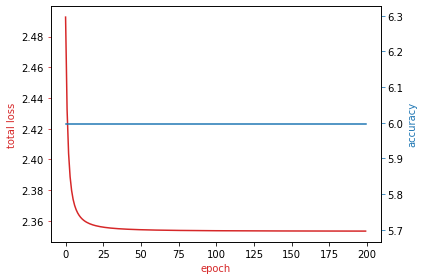

In [30]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list0,color=color)
ax1.set_ylabel('total loss',color=color)
ax1.set_xlabel('epoch',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(accuracy_list0, color=color)
ax2.set_ylabel('accuracy', color=color)  
ax2.set_xlabel('epoch',color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [32]:
import datetime
a = datetime.datetime.now()
model1 = Net(D_in = 10, H = 10, D_out = 6)
optimizer = torch.optim.SGD(model1.parameters(), lr = learning_rate)
trainloader = DataLoader(dataset = train1, batch_size = 100)
testloader = DataLoader(dataset = test1, batch_size = 100)
accuracy_list1, loss_list1, roc_auc1=train_model(model=model1,n_epochs=200,train_loader=trainloader,validation_loader=testloader,optimizer=optimizer)
b = datetime.datetime.now()
c = b-a
print(c.seconds)

339


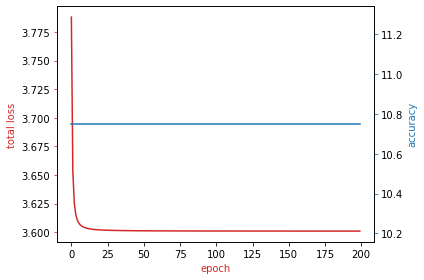

In [33]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list1,color=color)
ax1.set_ylabel('total loss',color=color)
ax1.set_xlabel('epoch',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(accuracy_list1, color=color)
ax2.set_ylabel('accuracy', color=color)  
ax2.set_xlabel('epoch',color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [34]:
import datetime
a = datetime.datetime.now()
model2 = Net(D_in = 10, H = 10, D_out = 6)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr = learning_rate)
trainloader = DataLoader(dataset = train2, batch_size = 100)
testloader = DataLoader(dataset = test2, batch_size = 100)
accuracy_list2, loss_list2, roc_auc2=train_model(model=model2,n_epochs=200,train_loader=trainloader,validation_loader=testloader,optimizer=optimizer)
b = datetime.datetime.now()
c = b-a
print(c.seconds)

345


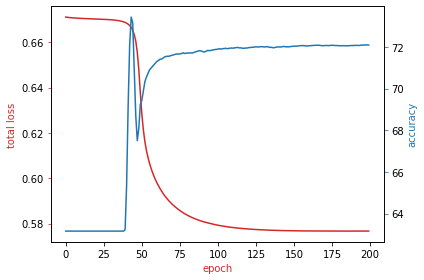

In [35]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list2,color=color)
ax1.set_ylabel('total loss',color=color)
ax1.set_xlabel('epoch',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(accuracy_list2, color=color)
ax2.set_ylabel('accuracy', color=color)  
ax2.set_xlabel('epoch',color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [36]:
import datetime
a = datetime.datetime.now()
model3 = Net(D_in = 10, H = 10, D_out = 6)
criterion = nn.BCEWithLogitsLoss(pos_weight = torch.tensor([50]))
optimizer = torch.optim.SGD(model3.parameters(), lr = learning_rate)
trainloader = DataLoader(dataset = train3, batch_size = 100)
testloader = DataLoader(dataset = test3, batch_size = 100)
accuracy_list3, loss_list3, roc_auc3=train_model(model=model3,n_epochs=200,train_loader=trainloader,validation_loader=testloader,optimizer=optimizer)
b = datetime.datetime.now()
c = b-a
print(c.seconds)

350


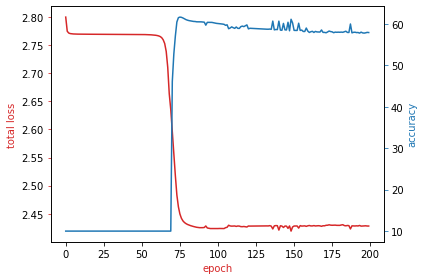

In [37]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list3,color=color)
ax1.set_ylabel('total loss',color=color)
ax1.set_xlabel('epoch',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(accuracy_list3, color=color)
ax2.set_ylabel('accuracy', color=color)  
ax2.set_xlabel('epoch',color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [38]:
import datetime
a = datetime.datetime.now()
model4 = Net(D_in = 10, H = 10, D_out = 6)
optimizer = torch.optim.SGD(model4.parameters(), lr = learning_rate)
trainloader = DataLoader(dataset = train4, batch_size = 100)
testloader = DataLoader(dataset = test4, batch_size = 100)
accuracy_list4, loss_list4, roc_auc4=train_model(model=model4,n_epochs=200,train_loader=trainloader,validation_loader=testloader,optimizer=optimizer)
b = datetime.datetime.now()
c = b-a
print(c.seconds)

427


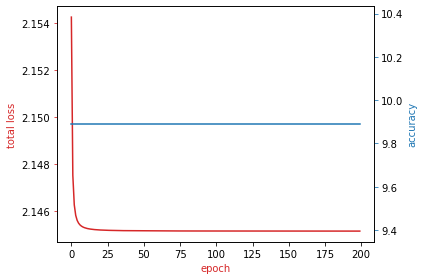

In [39]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list4,color=color)
ax1.set_ylabel('total loss',color=color)
ax1.set_xlabel('epoch',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(accuracy_list4, color=color)
ax2.set_ylabel('accuracy', color=color)  
ax2.set_xlabel('epoch',color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [40]:
csv = data_clientes_test[['Cliente']]
csv = csv.join(data_clientes_estructura.set_index('Cliente'), on = 'Cliente')
csv.insert(0, 'Mes', 10)
csv.drop(columns = ['Cliente'], inplace = True)
csv

,Mes,Gerencia2,SubCanal2,Categoria,Nevera,m1_vol,m2_vol,m3_vol,mi1_vol,mi2_vol
0,10,3,1,2,1,0.000000,0.000000,0.641953,0.313291,0.044756
1,10,3,4,4,1,0.000000,0.836406,0.163594,0.000000,0.000000
2,10,3,1,2,1,0.174983,0.000000,0.825017,0.000000,0.000000
3,10,2,3,2,1,1.000000,0.000000,0.000000,0.000000,0.000000
4,10,3,1,5,1,0.643216,0.000000,0.356784,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9297,10,9,7,1,0,0.000000,0.000000,0.000000,0.727273,0.272727
9298,10,10,1,2,0,0.000000,0.000000,0.000000,0.850000,0.150000
9299,10,10,3,3,0,0.000000,0.000000,0.000000,0.500000,0.500000
9300,10,10,8,1,0,0.000000,0.000000,0.000000,0.848485,0.151515


In [41]:
csv['Mes'] = csv['Mes']/12
csv['Gerencia2'] = csv['Gerencia2']/11
csv['SubCanal2'] = csv['SubCanal2']/32
csv['Categoria'] = csv['Categoria']/6
csv

,Mes,Gerencia2,SubCanal2,Categoria,Nevera,m1_vol,m2_vol,m3_vol,mi1_vol,mi2_vol
0,0.833333,0.272727,0.031250,0.333333,1,0.000000,0.000000,0.641953,0.313291,0.044756
1,0.833333,0.272727,0.125000,0.666667,1,0.000000,0.836406,0.163594,0.000000,0.000000
2,0.833333,0.272727,0.031250,0.333333,1,0.174983,0.000000,0.825017,0.000000,0.000000
3,0.833333,0.181818,0.093750,0.333333,1,1.000000,0.000000,0.000000,0.000000,0.000000
4,0.833333,0.272727,0.031250,0.833333,1,0.643216,0.000000,0.356784,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9297,0.833333,0.818182,0.218750,0.166667,0,0.000000,0.000000,0.000000,0.727273,0.272727
9298,0.833333,0.909091,0.031250,0.333333,0,0.000000,0.000000,0.000000,0.850000,0.150000
9299,0.833333,0.909091,0.093750,0.500000,0,0.000000,0.000000,0.000000,0.500000,0.500000
9300,0.833333,0.909091,0.250000,0.166667,0,0.000000,0.000000,0.000000,0.848485,0.151515


In [42]:
csv = torch.tensor(np.array(csv), dtype=torch.float32)
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()

Net(
  (linear1): Linear(in_features=10, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=6, bias=True)
  (linear5): Linear(in_features=6, out_features=1, bias=True)
)

In [43]:
marcas = ['Marca1', 'Marca2', 'Marca3', 'Marca_Inno1', 'Marca_Inno2']
data_clientes_test[marcas] = data_clientes_test[marcas].replace(1, 0)
data_clientes_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.000000,0.000000,0.000000,0.000000,0.000000
1,12,0.000000,0.000000,0.000000,0.000000,0.000000
2,14,0.000000,0.000000,0.000000,0.000000,0.000000
3,15,0.000000,0.000000,0.000000,0.000000,0.000000
4,18,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
9297,20186,0.000000,0.000000,0.000000,0.000000,0.000000
9298,20261,0.000000,0.000000,0.000000,0.000000,0.000000
9299,20309,0.000000,0.000000,0.000000,0.000000,0.000000
9300,20360,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
data_clientes_test['Marca1'] = model0(csv).detach().numpy()
data_clientes_test['Marca2'] = model2(csv).detach().numpy()
data_clientes_test['Marca3'] = model2(csv).detach().numpy()
data_clientes_test['Marca_Inno1'] = model2(csv).detach().numpy()
data_clientes_test['Marca_Inno2'] = model2(csv).detach().numpy()

In [45]:
for idx, i in enumerate(data_clientes_test['Marca1']):
    if np.isnan(i):
        data_clientes_test.loc[idx,'Marca1'] = 0.0

In [46]:
for idx, i in enumerate(data_clientes_test['Marca2']):
    if np.isnan(i):
        data_clientes_test.loc[idx,'Marca2'] = 0.0

In [47]:
for idx, i in enumerate(data_clientes_test['Marca3']):
    if np.isnan(i):
        data_clientes_test.loc[idx,'Marca3'] = 0.0

In [48]:
for idx, i in enumerate(data_clientes_test['Marca_Inno1']):
    if np.isnan(i):
        data_clientes_test.loc[idx,'Marca_Inno1'] = 0.0

In [49]:
for idx, i in enumerate(data_clientes_test['Marca_Inno2']):
    if np.isnan(i):
        data_clientes_test.loc[idx,'Marca_Inno2'] = 0.0

In [50]:
data_clientes_test['Marca1'].sum()

8108.263

In [51]:
data_clientes_test.to_csv('Dummy0.csv', sep = ',', index = False)

In [52]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=5)

In [53]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_cv = X_cv.to_numpy()
y_cv = y_cv.to_numpy()
print(X_train.shape, y_train.shape, X_cv.shape, y_train.shape)

(63069, 10) (63069, 5) (27030, 10) (63069, 5)


In [54]:
csv

tensor([[0.8333, 0.2727, 0.0312,  ..., 0.6420, 0.3133, 0.0448],
        [0.8333, 0.2727, 0.1250,  ..., 0.1636, 0.0000, 0.0000],
        [0.8333, 0.2727, 0.0312,  ..., 0.8250, 0.0000, 0.0000],
        ...,
        [0.8333, 0.9091, 0.0938,  ..., 0.0000, 0.5000, 0.5000],
        [0.8333, 0.9091, 0.2500,  ..., 0.0000, 0.8485, 0.1515],
        [0.8333, 0.5455, 0.0938,  ..., 0.0000, 0.0000, 1.0000]])

In [55]:
data_clientes_test['Marca1'].unique()

array([0.99877757, 0.99883085, 0.9987219 , ..., 0.9989201 , 0.99906605,
       0.99891305], dtype=float32)